# Pyfeat Tutorial

### 1. Toy system: Data Generation

We will walk you through using the API of pyfeat for different simulation types and the different available estimators. As a simple initial example we will consider an asymmetric double well as the potential landscape and a single particle diffusing in this potential according to Brownian dynamics. For this purpose we have prepared a set of scripts that will run short simulations and write the trajectories to file in the correct pyfeat format. If you want to learn how to prepare data in a pyfeat format, it might be worthwhile to have a closer look at the data generating files (trajectory_factory.py). 

In [1]:
#imports
#allow for the embedding of plots into the ipython notebook. 
%pylab inline 
import trajectory_factory as tf #this is the package that allows the quick generation of input data for pyfeat

Populating the interactive namespace from numpy and matplotlib


### Toy system: Umbrella sampling data analysis

In [2]:
tf.run_us_simulation() #generates umbrella sampling data for pyfeat in the directory US/

US simulation completed sucessfully!


In [3]:
trajlist = ['US/Traj0.dat', 'US/Traj1.dat', 'US/Traj2.dat', 'US/Traj3.dat', 'US/Traj4.dat', 'US/Traj5.dat', 'US/Traj6.dat',
            'US/Traj7.dat', 'US/Traj8.dat', 'US/Traj9.dat', 'US/Traj10.dat', 'US/Traj11.dat', 'US/Traj12.dat', 'US/Traj13.dat',
            'US/Traj14.dat', 'US/Traj15.dat', 'US/Traj16.dat', 'US/Traj17.dat', 'US/Traj18.dat', 'US/Traj19.dat', 'US/Traj20.dat',
            'US/Traj21.dat', 'US/Traj22.dat', 'US/Traj23.dat', 'US/Traj24.dat', 'US/Traj25.dat', 'US/Traj26.dat', 'US/Traj27.dat',
            'US/Traj28.dat', 'US/Traj29.dat']
#reader = Reader( trajlist, b_K_i_file = 'US/b_K_i.dat' ) #read trajectory and 'helper files'
#forge = Forge( reader.trajs, b_K_i = reader.b_K_i ) #pass read data to the data forge

In [4]:
#load all the exact results
exact = np.loadtxt('US/exact.dat')
exact[:,1] = exact[:,1]/np.sum(exact[:,1])

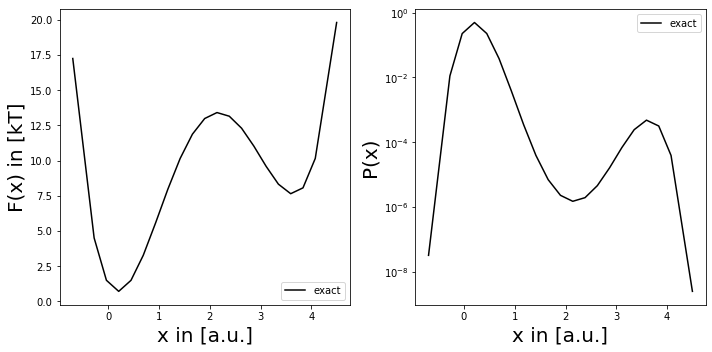

In [5]:
fig = plt.figure(1, figsize=(10,5))
fig.add_subplot(121)
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'F(x) in [kT]', fontsize = 20 )
plt.legend(loc=4)
fig.add_subplot(122)
plt.plot( exact[:,0], exact[:,1], color='k', label='exact' )
plt.xlabel( 'x in [a.u.]', fontsize = 20 )
plt.ylabel( 'P(x)', fontsize = 20 )
plt.semilogy()
plt.legend(loc=1)
plt.tight_layout()

## Figuring out pymbar

In [6]:
from pymbar import MBAR
from pymbar import timeseries
import csv

In [7]:
n_therm_state = len(trajlist)

In [8]:
data = []
for t in trajlist:
    data.append(np.loadtxt(t))

In [9]:
data = np.array(data)

In [10]:
N_k = numpy.zeros(shape=n_therm_state, dtype='int32')
for k in range(0, n_therm_state):
    N_k[k] = data[k].shape[0]

In [11]:
max_sample = int(max(N_k))

In [23]:
u_kln = numpy.zeros(shape=(n_therm_state,n_therm_state, max_sample))
x_kn = numpy.zeros(shape=(n_therm_state,max_sample))
for k in range(0, n_therm_state):
    u_kln[k, :, 0:N_k[k]] = data[k][:, 3:].transpose()
    x_kn[k] = data[k][:,0]

In [13]:
data[0].shape[0]

1000

In [14]:
data[1][0]

array([-4.011530e-01,  0.000000e+00,  1.000000e+00,  1.119819e+01,
        4.206570e+00,  5.709541e-01,  2.913433e-01,  3.367737e+00,
        9.800136e+00,  1.958854e+01,  3.273295e+01,  4.923336e+01,
        6.908978e+01,  9.230220e+01,  1.188706e+02,  1.487951e+02,
        1.820755e+02,  2.187119e+02,  2.587044e+02,  3.020528e+02,
        3.487573e+02,  3.988178e+02,  4.522342e+02,  5.090067e+02,
        5.691352e+02,  6.326196e+02,  6.994601e+02,  7.696566e+02,
        8.432091e+02,  9.201176e+02,  1.000382e+03,  1.084003e+03,
        1.170979e+03])

In [15]:
mbar = MBAR(u_kln, N_k, verbose=True)

K (total states) = 30, total samples = 30000
N_k = 
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000]
There are 30 states with samples.
Initializing free energies to zero.
Initial dimensionless free energies with method zeros
f_k = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 2.6888e+06, Newton-Raphson gradient norm is 4.5406e+07
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 1.9344e+06, Newton-Raphson gradient norm is 2.5897e+06
Choosing self-consistent iteration for lower gradient on iteration 1
self consistent iteration gradient norm is 1.4572e+06, Newton-Raphson gradient norm is 2.6661e+05
Newton-Raphson used on iteration 2
self consistent iteration gradient 

In [16]:
f_k= mbar.f_k

In [17]:
(deltaF_ij, dDeltaF_ij) = mbar.getFreeEnergyDifferences()

In [18]:
deltaF_mbar = deltaF_ij[0, n_therm_state-1]
dDeltaF_mbar = dDeltaF_ij[0, n_therm_state-1]
pmf_mbar = numpy.zeros(shape=(n_therm_state, 3))

In [19]:
pmf_mbar[:, 0] = np.linspace(-0.9,4.7,30)
pmf_mbar[:, 1] = f_k
pmf_mbar[:,2] = dDeltaF_ij[0]

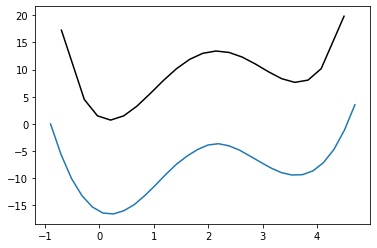

In [20]:
plt.plot( exact[:,0], -np.log(exact[:,1]), color='k', label='exact' )
plot(pmf_mbar[:,0],pmf_mbar[:,1])

## Compute thermodynamic length

In [21]:
def kln_to_kn(kln, N_k = None, cleanup = False):

    """ Convert KxKxN_max array to KxN max array
    if self.N is not initialized, it will be here.
    Parameters
    ----------
    u_kln : np.ndarray, float, shape=(KxLxN_max)
    N_k (optional) : np.array
        the N_k matrix from the previous formatting form
    cleanup (optional) : bool
        optional command to clean up, since u_kln can get very large
    Outputs
    -------
    u_kn: np.ndarray, float, shape=(LxN)
    """

    #print "warning: KxLxN_max arrays deprecated; convering into new preferred KxN shape"

    # rewrite into kn shape
    [K, L, N_max] = np.shape(kln)

    if N_k is None:
        # We assume that all N_k are N_max.
        # Not really an easier way to do this without being given the answer.
        N_k = N_max * np.ones([L], dtype=np.int64)
    N = np.sum(N_k)

    kn = np.zeros([L, N], dtype=np.float64)
    i = 0
    for k in range(K):  # loop through the old K; some might be zero
        for ik in range(N_k[k]):
            kn[:, i] = kln[k, :, ik]
            i += 1
    if cleanup:
        del(kln)  # very big, let's explicitly delete

    return kn

In [44]:
u_kn = kln_to_kn(u_kln,N_k)

In [45]:
expectations = mbar.computeExpectations(u_kn)

ValueError: operands could not be broadcast together with shapes (30,) (30000,) 

In [33]:
index=0
x_n = np.zeros([n_therm_state*max_sample], np.float64)
for k, N in enumerate(N_k):
    x_n[index:(index + N)] = x_kn[k,N]
    index +=N


IndexError: index 1000 is out of bounds for axis 1 with size 1000

In [29]:
N_k

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000], dtype=int32)

In [32]:
shape(x_n)

(30000,)